In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Flujo 1
flujo1 = [ 60.76659012,  57.62647247,  50.41750336,  49.53574753,  48.33449936,
43.66425323,  41.04115295,  44.66896057,  50.56383896,  50.29148102,
48.44561386,  50.44940948,  51.58250809,  59.35596085,  77.53921509,
91.3781662 , 103.63374329, 123.92726898, 152.38206482, 170.97193909,
178.31158447 ,201.74856567, 216.82427979, 194.56236267, 156.55189514,
128.12651062  ,96.53326416,  70.87791443,  64.37514496,  64.37010193,
69.20238495,  74.72666168,  73.84421539,  70.54618073,  67.37627411,
70.02364349,  71.76290894,  70.48664093,  66.65513611,  62.97803116,
63.47818756 , 63.48593521,  63.65970612,  65.12601471,  61.96345139,
56.5904007  , 56.21949005]


In [3]:

#Flujo 2
flujo2 = [ 34.51300049,  35.04608917,  33.54432678,  37.79356384,  40.9273262,
38.60827255,  36.60696411,  39.29825211,  42.8025322,   41.11476135,
37.01183701,  38.25086212,  39.82696915,  45.49356461,  57.84592056,
63.74675751,  71.27405548,  90.15153503, 105.11828613, 124.74910736,
141.62988281, 139.71665955, 122.26168823, 108.24037933, 110.01968384,
99.83040619,  70.3952713,   55.88486481,  57.34952545,  56.50667191,
57.90737534,  60.49988937,  54.65034103,  43.25989914,  42.46909714,
48.96273041,  49.04454422,  48.71305084,  50.70087433,  50.2251091,
44.70508194,  40.60639191,  40.11267853,  43.38873672,  44.70631409,
37.76773453,  31.70433426]

 _________________________________

In [4]:
Y = flujo1
X = [6653 +i*.43 for i in range(0,len(Y))]# np.array(range(1,len(Y)+1))
X

[6653.0,
 6653.43,
 6653.86,
 6654.29,
 6654.72,
 6655.15,
 6655.58,
 6656.01,
 6656.44,
 6656.87,
 6657.3,
 6657.73,
 6658.16,
 6658.59,
 6659.02,
 6659.45,
 6659.88,
 6660.31,
 6660.74,
 6661.17,
 6661.6,
 6662.03,
 6662.46,
 6662.89,
 6663.32,
 6663.75,
 6664.18,
 6664.61,
 6665.04,
 6665.47,
 6665.9,
 6666.33,
 6666.76,
 6667.19,
 6667.62,
 6668.05,
 6668.48,
 6668.91,
 6669.34,
 6669.77,
 6670.2,
 6670.63,
 6671.06,
 6671.49,
 6671.92,
 6672.35,
 6672.78]

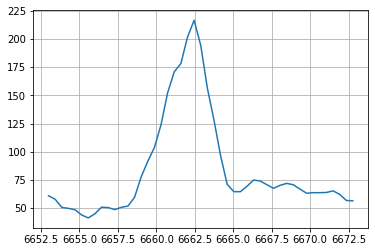

In [5]:
plt.plot(X,Y);
plt.grid()

In [6]:

def fit_gauss(x, p):
    A, mu, sigma = p
    return( A * np.exp(-(x-mu)*(x-mu)/(2.0*sigma*sigma)) + zerolev )


def main_fitter(p,x,y,ngauss):
    chi2 = 0

    model = np.zeros(np.array(y).shape)
    split_p = np.split(np.array(p),ngauss)
    
    for g in range(ngauss):
        gp = split_p[g]
        
        # Revisar amplitudes
        if gp[0] <= 0: # evita amplitud negativa
            return 1e10
        if gp[2] <=0 or gp[2] >= 20:  # Limites en dispersion
            return 1e10
        else:
            model += fit_gauss(x,gp)
    
    chi2 = sum((y-model)**2 )
    
    return chi2

In [7]:
# Condiciones iniciales

# Amplitud, media, dispersión, offset
N = 3

zerolev = min(Y)/N
print("Nivel cero:", zerolev)

#p0 = [100, 30, 10,   # Gaussiana 1
#      100, 10, 10]   # Gaussiana 2

Nivel cero: 13.680384316666666


In [9]:
Niters = 250

Results = {}

for i in range(Niters):
    p0 = []
    for j in range(N):
        p0.append([
            np.random.uniform(80,130),  # Amplitud
            np.random.uniform(6650,6670),  # Media
            np.random.uniform(3, 8),  # Disp
            ])
    
    fit = minimize(main_fitter, p0, method= 'Powell', 
        options={'maxiter':15000, 'maxfev':15000, 'disp':True, 'adaptive':True},
        args=(X,Y,N,))

    Results[fit.fun] = fit.x
    
    #print(p0)

print(fit.fun)
print(f"\nMejor solución:\n {fit.x}")

C:\Users\aphic\anaconda3\lib\site-packages\ipykernel_launcher.py:16: OptimizeWarning: Unknown solver options: adaptive
  app.launch_new_instance()


Optimization terminated successfully.
         Current function value: 2597.401255
         Iterations: 19
         Function evaluations: 1984
Optimization terminated successfully.
         Current function value: 2952.695855
         Iterations: 16
         Function evaluations: 2231
Optimization terminated successfully.
         Current function value: 1112.416202
         Iterations: 28
         Function evaluations: 2783
Optimization terminated successfully.
         Current function value: 2331.344507
         Iterations: 35
         Function evaluations: 3769
Optimization terminated successfully.
         Current function value: 2389.999838
         Iterations: 13
         Function evaluations: 1333
Optimization terminated successfully.
         Current function value: 2597.373925
         Iterations: 13
         Function evaluations: 1336
Optimization terminated successfully.
         Current function value: 2597.993232
         Iterations: 22
         Function evaluations: 2372

Optimization terminated successfully.
         Current function value: 1111.603739
         Iterations: 26
         Function evaluations: 2471
Optimization terminated successfully.
         Current function value: 17620.671253
         Iterations: 6
         Function evaluations: 826
Optimization terminated successfully.
         Current function value: 2328.503001
         Iterations: 27
         Function evaluations: 3165
Optimization terminated successfully.
         Current function value: 3216.791497
         Iterations: 19
         Function evaluations: 2131
Optimization terminated successfully.
         Current function value: 1114.186560
         Iterations: 24
         Function evaluations: 2377
Optimization terminated successfully.
         Current function value: 5175.948435
         Iterations: 11
         Function evaluations: 1263
Optimization terminated successfully.
         Current function value: 17724.884440
         Iterations: 6
         Function evaluations: 909
O

Optimization terminated successfully.
         Current function value: 2597.375843
         Iterations: 11
         Function evaluations: 1116
Optimization terminated successfully.
         Current function value: 2597.413688
         Iterations: 16
         Function evaluations: 1749
Optimization terminated successfully.
         Current function value: 2351.592075
         Iterations: 41
         Function evaluations: 4788
Optimization terminated successfully.
         Current function value: 11837.661166
         Iterations: 8
         Function evaluations: 1070
Optimization terminated successfully.
         Current function value: 2863.842443
         Iterations: 43
         Function evaluations: 7324
Optimization terminated successfully.
         Current function value: 4327.250954
         Iterations: 14
         Function evaluations: 2329
Optimization terminated successfully.
         Current function value: 2629.468994
         Iterations: 19
         Function evaluations: 2131

Optimization terminated successfully.
         Current function value: 1112.068951
         Iterations: 22
         Function evaluations: 2244
Optimization terminated successfully.
         Current function value: 2597.523261
         Iterations: 20
         Function evaluations: 2397
Optimization terminated successfully.
         Current function value: 1196.737180
         Iterations: 25
         Function evaluations: 2454
Optimization terminated successfully.
         Current function value: 1111.533538
         Iterations: 30
         Function evaluations: 2912
Optimization terminated successfully.
         Current function value: 1112.170631
         Iterations: 24
         Function evaluations: 2355
Optimization terminated successfully.
         Current function value: 4406.764563
         Iterations: 19
         Function evaluations: 2847
Optimization terminated successfully.
         Current function value: 2597.460117
         Iterations: 17
         Function evaluations: 1779

Optimization terminated successfully.
         Current function value: 1111.571108
         Iterations: 29
         Function evaluations: 2817
Optimization terminated successfully.
         Current function value: 2597.487309
         Iterations: 16
         Function evaluations: 1641
Optimization terminated successfully.
         Current function value: 2223.428966
         Iterations: 19
         Function evaluations: 1944
Optimization terminated successfully.
         Current function value: 2559.834612
         Iterations: 20
         Function evaluations: 2327
Optimization terminated successfully.
         Current function value: 2639.122398
         Iterations: 36
         Function evaluations: 4440
Optimization terminated successfully.
         Current function value: 14741.263526
         Iterations: 6
         Function evaluations: 811
Optimization terminated successfully.
         Current function value: 2902.278804
         Iterations: 39
         Function evaluations: 5922


### El mejor de todos los resultados

In [10]:
best = min(Results.keys())
print(best)
best_fit = Results[best]
print(best_fit)

1111.5335376176754
[1.12488681e+02 6.66270489e+03 8.34176431e-01 2.77721381e+01
 6.66664594e+03 6.76618650e+00 8.50506981e+01 6.66105833e+03
 1.11975198e+00]


## Plot

In [11]:
def plot_total(ptot, x, N):
    model_tot = np.zeros(np.array(x).shape)
    split_p = np.split(np.array(ptot),N)
    
    for g in range(N):
        gp =  split_p[g]
        model_tot += fit_gauss(x,gp)
    
    return model_tot

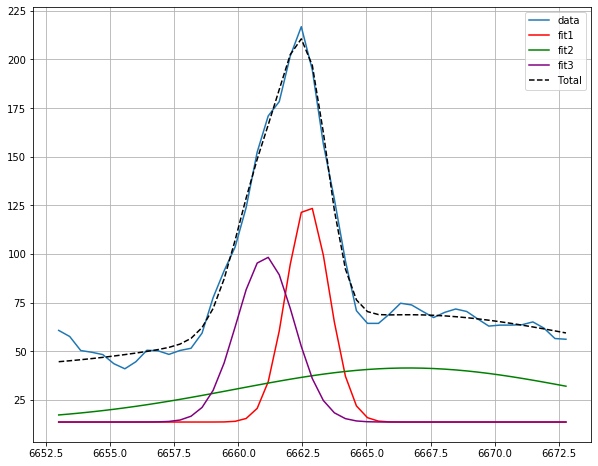

In [12]:
col = ['red','green','purple']

plt.figure(figsize=(10,8))
plt.plot(X,Y, label="data")

for i, g in enumerate(np.split(np.array(best_fit),N)):
    plt.plot(X, fit_gauss(X,g), label=f'fit{i+1}', color=col[i])
    
# total:
model_tot = plot_total(best_fit,X,N)
plt.plot(X, model_tot, color = 'k', ls='--', label='Total')
plot_total(best_fit, X, N)
plt.grid(); 
plt.legend()

In [13]:
porcentaje = .20
best_results = sorted([i for i in Results.keys()])
best_results = best_results[0:int(len(best_results)*porcentaje)]
best_results;

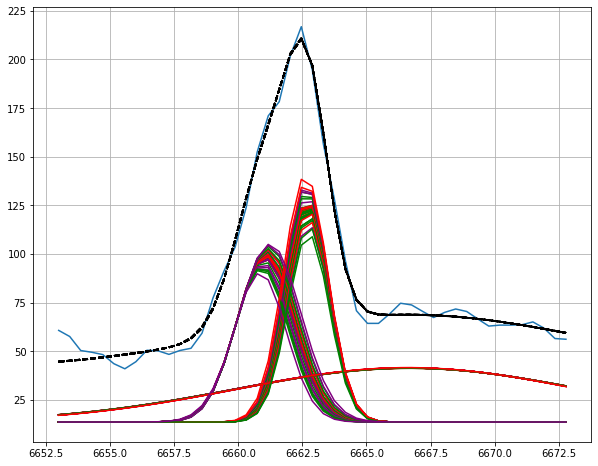

In [15]:
# Todas las mejores %
plt.figure(figsize=(10,8))

plt.plot(X,Y, label="data")

for k in best_results:
    best_fit = Results[k]
    for i, g in enumerate(np.split(np.array(best_fit),N)):
        plt.plot(X, fit_gauss(X,g), label=f'fit{i+1}', color=col[i])
    
    # total:
    model_tot = plot_total(best_fit,X,N)

    plt.plot(X, model_tot, color = 'k', ls='--', label='Total')
plot_total(best_fit, X, N)
plt.grid(); 
#plt.legend()

In [16]:
amplitudes =[Results[i][0] for i in best_results]
medias =[Results[i][1] for i in best_results]
dispersiones =[Results[i][2] for i in best_results]

(array([23.,  0.,  0.,  0.,  0.,  7.,  1.,  1., 16.,  2.]),
 array([ 27.64092533,  37.56948138,  47.49803744,  57.42659349,
         67.35514954,  77.28370559,  87.21226164,  97.14081769,
        107.06937374, 116.99792979, 126.92648584]),
 <a list of 10 Patch objects>)

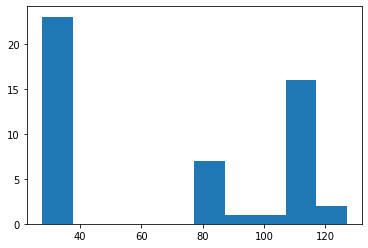

In [17]:
plt.hist(amplitudes)

(array([ 8.,  0., 18.,  1.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([6661.03548346, 6661.59938393, 6662.1632844 , 6662.72718488,
        6663.29108535, 6663.85498582, 6664.41888629, 6664.98278676,
        6665.54668723, 6666.1105877 , 6666.67448818]),
 <a list of 10 Patch objects>)

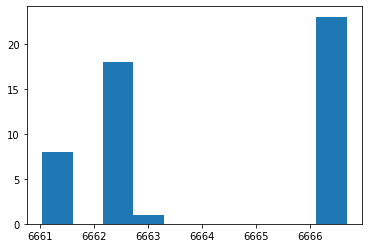

In [18]:
plt.hist(medias)

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([0.81850662, 1.42071178, 2.02291693, 2.62512208, 3.22732723,
        3.82953239, 4.43173754, 5.03394269, 5.63614784, 6.23835299,
        6.84055815]),
 <a list of 10 Patch objects>)

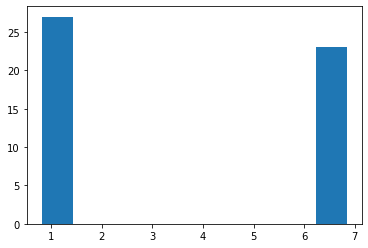

In [19]:
plt.hist(dispersiones)